# Importing recquired libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
%matplotlib inline

In [2]:
train_path = '../input/appleonly/AppleOnly'

In [3]:
image_size = 224
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)
batch_size = 64

In [4]:
train_aug = ImageDataGenerator(
    rescale=1/255.0,
    fill_mode="nearest",
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
)

train_data = train_aug.flow_from_directory(
    train_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 12194 images belonging to 5 classes.


# ResNet50

In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [6]:
base_model = ResNet50(weights= None, include_top=False, input_shape= input_shape)


2022-07-17 18:00:15.056086: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-17 18:00:15.141679: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-17 18:00:15.142471: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-17 18:00:15.143594: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
outputs = Dense(len(list(train_data.class_indices.keys())), activation="softmax")(x)
model = Model(inputs = base_model.input, outputs = outputs)

In [8]:
model.compile(optimizer= "adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

# Model training

In [10]:
history = model.fit(
    train_data,
    epochs=50,
    steps_per_epoch=150,
    batch_size = batch_size
)

2022-07-17 18:00:19.869473: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-07-17 18:00:26.821370: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


150/150 [==============================] - 164s 1s/step - loss: 0.5772 - accuracy: 0.8026
Epoch 2/50
150/150 [==============================] - 139s 925ms/step - loss: 0.3197 - accuracy: 0.8901
Epoch 3/50
150/150 [==============================] - 136s 903ms/step - loss: 0.2703 - accuracy: 0.9044
Epoch 4/50
150/150 [==============================] - 134s 893ms/step - loss: 0.2332 - accuracy: 0.9228
Epoch 5/50
150/150 [==============================] - 135s 900ms/step - loss: 0.1974 - accuracy: 0.9328
Epoch 6/50
150/150 [==============================] - 134s 893ms/step - loss: 0.1638 - accuracy: 0.9448
Epoch 7/50
150/150 [==============================] - 136s 901ms/step - loss: 0.1314 - accuracy: 0.9577
Epoch 8/50
150/150 [==============================] - 135s 898ms/step - loss: 0.3133 - accuracy: 0.9069
Epoch 9/50
150/150 [==============================] - 135s 898ms/step - loss: 0.1547 - accuracy: 0.9455
Epoch 10/50
150/150 [==============================] - 135s 901ms/step - loss:

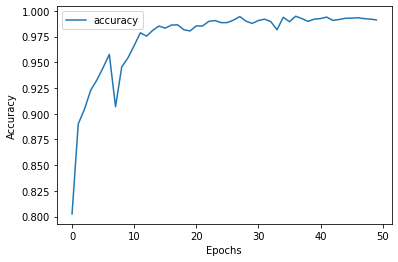

In [11]:
hist = history.history
plt.plot(hist["accuracy"], label="accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.show()

In [12]:
model.save("Apple.h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


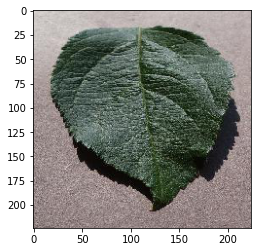

In [13]:
from tensorflow.keras.applications.resnet50 import preprocess_input
img_path = "../input/appleonly/AppleOnly/Apple___healthy/00907d8b-6ae6-4306-bfd7-d54471981a86___RS_HL 5709_FlipTB.JPG"
img = image.load_img(img_path, target_size=target_size)
img = image.img_to_array(img)
img = img/255.0
img_batch = np.expand_dims(img, axis=0)
plt.imshow(img)

In [14]:
predicted_class = np.argmax(model.predict(img_batch))
print(f"predicted class: {predicted_class}")
print("\nClass dictionary")
print(train_data.class_indices)

predicted class: 3

Class dictionary
{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Other': 4}
